In [1]:
import sys
import gc
import numpy as np
import mmwave.dsp as dsp
import mmwave.clustering as clu
from mmwave.dataloader import DCA1000
from demo.visualizer.visualize import ellipse_visualize
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation


In [2]:
numFrames = 294
numADCSamples = 256
numTxAntennas = 3
numRxAntennas = 4
numLoopsPerFrame = 16
numChirpsPerFrame = numTxAntennas * numLoopsPerFrame
numVirtAntennas = numTxAntennas * numRxAntennas

In [3]:
adc_data = np.fromfile("parser_scripts/adc_data.bin", dtype=np.uint16)
adc_data = adc_data.reshape(numFrames, -1)
adc_data = np.apply_along_axis(DCA1000.organize, 1, adc_data, num_chirps=numChirpsPerFrame,
                                num_rx=numRxAntennas, num_samples=numADCSamples)
print(f'adc_data shape: {adc_data.shape}')
# print("Data Loaded!")

adc_data shape: (294, 48, 4, 256)


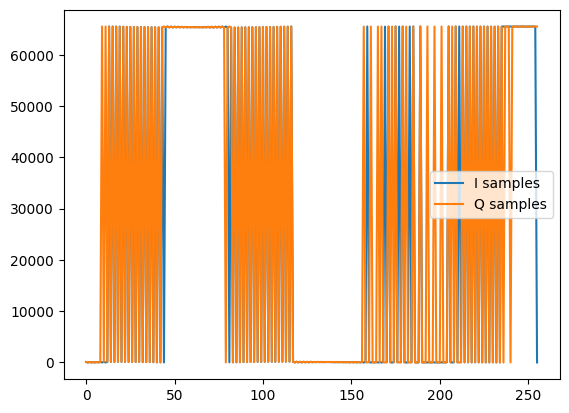

In [4]:
if_sig = adc_data[50][0][0] #50th frame, 1st Tx antenna, 1st chirp, 1st Rx antenna
plt.plot(np.real(if_sig), label='I samples')
plt.plot(np.imag(if_sig), label='Q samples')
plt.legend()

In [5]:
# Parameters 
f0 = 77e9 # 77 Ghz
S1 = 70e12 # Mhz / us 
S2 = 69e12 # Mhz / us 
fs = 5209 # ksps 
t_adc = 49.14e-6 #us
t_adc_valid = 7e-6 #us
t = np.linspace(0, t_adc + t_adc_valid, int(fs*1e3*(t_adc + t_adc_valid)))
print(len(t))
print(t)

# Template 
# phi_template = 2*np.pi*( S1*tau*t_rs + 0.5*(S1-Srx)*t_rs**2 + (f0*tau - 0.5*Srx*tau**2)) 

292
[0.00000000e+00 1.92920962e-07 3.85841924e-07 5.78762887e-07
 7.71683849e-07 9.64604811e-07 1.15752577e-06 1.35044674e-06
 1.54336770e-06 1.73628866e-06 1.92920962e-06 2.12213058e-06
 2.31505155e-06 2.50797251e-06 2.70089347e-06 2.89381443e-06
 3.08673540e-06 3.27965636e-06 3.47257732e-06 3.66549828e-06
 3.85841924e-06 4.05134021e-06 4.24426117e-06 4.43718213e-06
 4.63010309e-06 4.82302405e-06 5.01594502e-06 5.20886598e-06
 5.40178694e-06 5.59470790e-06 5.78762887e-06 5.98054983e-06
 6.17347079e-06 6.36639175e-06 6.55931271e-06 6.75223368e-06
 6.94515464e-06 7.13807560e-06 7.33099656e-06 7.52391753e-06
 7.71683849e-06 7.90975945e-06 8.10268041e-06 8.29560137e-06
 8.48852234e-06 8.68144330e-06 8.87436426e-06 9.06728522e-06
 9.26020619e-06 9.45312715e-06 9.64604811e-06 9.83896907e-06
 1.00318900e-05 1.02248110e-05 1.04177320e-05 1.06106529e-05
 1.08035739e-05 1.09964948e-05 1.11894158e-05 1.13823368e-05
 1.15752577e-05 1.17681787e-05 1.19610997e-05 1.21540206e-05
 1.23469416e-05 1.25

In [6]:
# Receiving signal with time differece
d = 105e-3 #m 
c = 3e8 # m/s
tau = d/c
print(tau)

3.5e-10


delta =  0


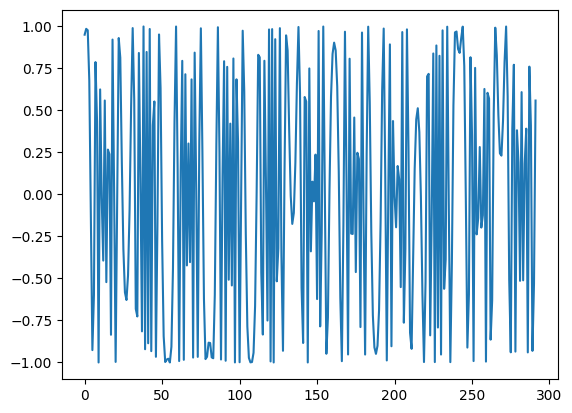

In [7]:
np.random.seed(41)
delta = 0 #np.random.rand()*2*np.pi  # Generate a random phase shift (due to lack of phase locking)
phi_template = 2*np.pi*( S2*tau*t + 0.5*(S1-S2)*t**2 + (f0*tau - 0.5*S2*tau**2) ) - delta
template_sig = np.cos(phi_template) 

print("delta = ", delta)
plt.plot(template_sig)


In [12]:
# S2 needs to be very close to S1 to satisfy sampling requirements 
S2 = 69.99e12 
(S2*tau + (S1-S2)*t[-1])/1e6

np.float64(0.5858965)

In [9]:
t[-1]

np.float64(5.614e-05)